<h1>Neteja de Dades<h1>

<h3>NYC Colissions<h3>

<h4>Vista global de la distribució de les dades i els valors NULL<h4>

In [66]:
import pandas as pd
path = "./data/original-data.csv"

# Read the data
df = pd.read_csv(path)
print(df.head())

   CRASH DATE CRASH TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE   
0  09/06/2020      18:05        NaN       NaN  40.771038  -73.83413  \
1  09/20/2020       9:14        NaN       NaN  40.722095  -73.77772   
2  09/24/2020      22:00  MANHATTAN   10039.0  40.824757  -73.94052   
3  08/06/2020       5:30        NaN       NaN        NaN        NaN   
4  08/01/2020      17:16      BRONX   10462.0  40.840508  -73.85515   

                 LOCATION         ON STREET NAME CROSS STREET NAME   
0  (40.771038, -73.83413)  WHITESTONE EXPRESSWAY               NaN  \
1  (40.722095, -73.77772)     GRAND CENTRAL PKWY               NaN   
2  (40.824757, -73.94052)               8 AVENUE   WEST 148 STREET   
3                     NaN                    NaN               NaN   
4  (40.840508, -73.85515)    METROPOLITAN AVENUE      LINDEN DRIVE   

               OFF STREET NAME  ...   CONTRIBUTING FACTOR VEHICLE 2   
0                          NaN  ...           Following Too Closely  \
1         

In [109]:
# Convert the CRASH DATE column to datetime format
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Filter the dataframe to only include rows where the CRASH DATE column is in 2019
df_2019 = df[df['CRASH DATE'].dt.year == 2019]

# Print the filtered dataframe
print(df_2019)


Empty DataFrame
Columns: [CRASH DATE, CRASH TIME, BOROUGH, ZIP CODE, LATITUDE, LONGITUDE, LOCATION, ON STREET NAME, CROSS STREET NAME, OFF STREET NAME, NUMBER OF PERSONS INJURED, NUMBER OF PERSONS KILLED, NUMBER OF PEDESTRIANS INJURED, NUMBER OF PEDESTRIANS KILLED, NUMBER OF CYCLIST INJURED, NUMBER OF CYCLIST KILLED, NUMBER OF MOTORIST INJURED, NUMBER OF MOTORIST KILLED, CONTRIBUTING FACTOR VEHICLE 1, CONTRIBUTING FACTOR VEHICLE 2, CONTRIBUTING FACTOR VEHICLE 3, CONTRIBUTING FACTOR VEHICLE 4, CONTRIBUTING FACTOR VEHICLE 5, COLLISION_ID, VEHICLE TYPE CODE 1, VEHICLE TYPE CODE 2, VEHICLE TYPE CODE 3, VEHICLE TYPE CODE 4, VEHICLE TYPE CODE 5]
Index: []

[0 rows x 29 columns]


In [67]:
# Show number of unique values for each column
print(df.nunique())

# Show value counts for each column
for col in df.columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


CRASH DATE                          246
CRASH TIME                         1440
BOROUGH                               5
ZIP CODE                            208
LATITUDE                          36140
LONGITUDE                         28230
LOCATION                          49019
ON STREET NAME                     4583
CROSS STREET NAME                  5103
OFF STREET NAME                   25437
NUMBER OF PERSONS INJURED            17
NUMBER OF PERSONS KILLED              4
NUMBER OF PEDESTRIANS INJURED         6
NUMBER OF PEDESTRIANS KILLED          2
NUMBER OF CYCLIST INJURED             4
NUMBER OF CYCLIST KILLED              2
NUMBER OF MOTORIST INJURED           17
NUMBER OF MOTORIST KILLED             4
CONTRIBUTING FACTOR VEHICLE 1        55
CONTRIBUTING FACTOR VEHICLE 2        51
CONTRIBUTING FACTOR VEHICLE 3        30
CONTRIBUTING FACTOR VEHICLE 4        14
CONTRIBUTING FACTOR VEHICLE 5         9
COLLISION_ID                     116655
VEHICLE TYPE CODE 1                 360


In [68]:
# Show number of missing values for each column
print(df.isnull().sum())


CRASH DATE                            0
CRASH TIME                            0
BOROUGH                           40954
ZIP CODE                          40969
LATITUDE                           7733
LONGITUDE                          7733
LOCATION                           7733
ON STREET NAME                    29704
CROSS STREET NAME                 60627
OFF STREET NAME                   87177
NUMBER OF PERSONS INJURED             2
NUMBER OF PERSONS KILLED              4
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1       358
CONTRIBUTING FACTOR VEHICLE 2     19755
CONTRIBUTING FACTOR VEHICLE 3    107459
CONTRIBUTING FACTOR VEHICLE 4    114449
CONTRIBUTING FACTOR VEHICLE 5    116034
COLLISION_ID                          0
VEHICLE TYPE CODE 1                 738


<h4>Borrem Columnes no importants<h4>

In [69]:
# Drop columns not relevant for our analysis
columns_to_drop = ['ZIP CODE', 'LATITUDE', 'LONGITUDE', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']
df2 = df.drop(columns=columns_to_drop)


<h4> Solucionem els valors NULL <h4>

In [70]:
# Count number of missing values for each column
print(df2.isnull().sum())

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                      40954
LOCATION                      7733
NUMBER OF PERSONS INJURED        2
NUMBER OF PERSONS KILLED         4
VEHICLE TYPE CODE 1            738
dtype: int64


In [71]:
# Fill in missing values with 0 for the following columns:
df2['NUMBER OF PERSONS INJURED'].fillna(0, inplace=True)
df2['NUMBER OF PERSONS KILLED'].fillna(0, inplace=True)

In [72]:
# Drop rows with missing values for the following columns:
df2.dropna(subset=['VEHICLE TYPE CODE 1'], inplace=True)


In [73]:
# Count number of missing values in LOCATION and BOROUGH simultaneously
print((df['LOCATION'].isnull() & df['BOROUGH'].isnull()).sum())

5481


In [74]:
# Drop rows with missing values for both LOCATION and BOROUGH
df2.dropna(subset=['LOCATION', 'BOROUGH'], how='all', inplace=True)


In [75]:
# Count number of missing values for each column
print(df2.isnull().sum())

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                      35326
LOCATION                      2244
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
VEHICLE TYPE CODE 1              0
dtype: int64


In [76]:
# Drop rows with missing values for the following columns:
df2.dropna(subset=['LOCATION'], inplace=True)
df3 = df2

<h4> Arrodonir variable CRASH TIME <h4>

In [85]:
# Round the values in the CRASH TIME column to the nearest hour
df3['CRASH TIME'] = pd.to_datetime(df['CRASH TIME']).dt.round('H').dt.time

# Print the updated dataframe
print(df3.head())
df4 = df3

C:\Users\gerar\AppData\Local\Temp\ipykernel_20524\4184744373.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3['CRASH TIME'] = pd.to_datetime(df['CRASH TIME']).dt.round('H').dt.time


   CRASH DATE CRASH TIME    BOROUGH                 LOCATION   
0  09/06/2020   18:00:00        NaN   (40.771038, -73.83413)  \
1  09/20/2020   09:00:00        NaN   (40.722095, -73.77772)   
2  09/24/2020   22:00:00  MANHATTAN   (40.824757, -73.94052)   
4  08/01/2020   17:00:00      BRONX   (40.840508, -73.85515)   
5  06/04/2020   08:00:00     QUEENS  (40.744232, -73.861275)   

   NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED   
0                        0.0                       1.0  \
1                        0.0                       0.0   
2                        0.0                       0.0   
4                        0.0                       1.0   
5                        0.0                       0.0   

                   VEHICLE TYPE CODE 1  WEEKDAY  BEFORE COVID  
0  Station Wagon/Sport Utility Vehicle    False         False  
1                                Sedan    False         False  
2                                Sedan     True         False  
4         

<h4>Afegir columnes interessants per a les preguntes a respondre<h4>

In [86]:
# Create a new column that indicates whether the accident occurred on a weekday or a weekend
df4['WEEKDAY'] = pd.to_datetime(df3['CRASH DATE']).dt.dayofweek < 5

# Create a new column that indicates whether the accident occurred before or after COVID-19
covid_start_date = pd.to_datetime('2020-03-01')
df4['BEFORE COVID'] = pd.to_datetime(df3['CRASH DATE']) < covid_start_date


<h2> Responent alguna prgunta <h2>

<h5>Are there any areas with a larger number of accidents?<h5>

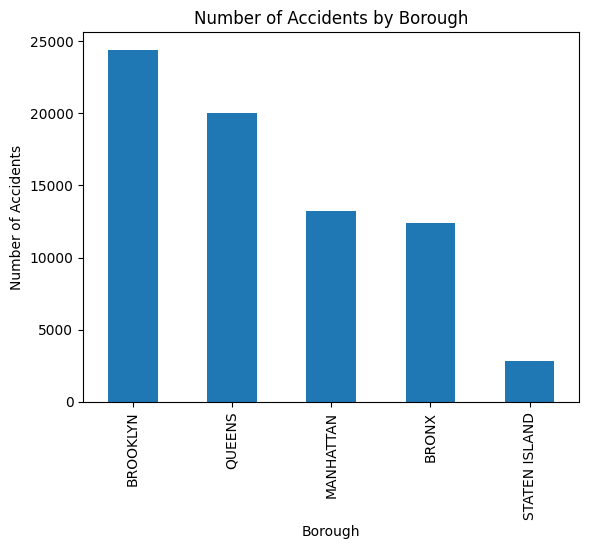

In [87]:
import matplotlib.pyplot as plt

# Create a bar plot of the number of accidents by borough
df4['BOROUGH'].value_counts().plot(kind='bar')
plt.title('Number of Accidents by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Accidents')
plt.show()


In [80]:
area_BOROUGH = {"Broklin": 179.7, "Manhattan": 58.8, "Queens":281.5, "Bronx": 109.3, "Staten Island": 148.9}

<h5>Is there any type of vehicle more prone to participate in accidents?<h5>

In [88]:
import altair as alt

# Create a dataframe with the value counts of the 'VEHICLE TYPE CODE 1' column
df_vehicle_counts = df4['VEHICLE TYPE CODE 1'].value_counts().reset_index()
df_vehicle_counts.columns = ['Vehicle Type', 'Count']

# Create a horizontal bar chart using Altair
chart = alt.Chart(df_vehicle_counts[:10]).mark_bar().encode(
    y=alt.Y('Vehicle Type:N', sort='-x'),
    x=alt.X('Count:Q'),
    tooltip=['Vehicle Type', 'Count']
).properties(
    title='Vehicle Types Involved in Accidents'
)

chart


alt.Chart(...)

<h5> At what time of the day are accidents more common? <h5>

In [91]:
# Convert the CRASH TIME column to a string
df4['CRASH TIME'] = df3['CRASH TIME'].astype(str)

# Group the data by hour and count the number of accidents for each hour
df_hourly = df4.groupby('CRASH TIME').size().reset_index(name='COUNT')

# Create a line chart of the number of accidents by hour using Altair
chart = alt.Chart(df_hourly).mark_line().encode(
    x='CRASH TIME:O',
    y='COUNT:Q'
).properties(
    title='Number of Accidents by Hour of the Day'
)

chart


alt.Chart(...)

<h5>¿Cuál es el promedio de personas heridas y personas muertas en los accidentes de vehículos en Nueva York? ¿Ha habido cambios significativos en estos números con el tiempo?<h5>

In [96]:
mean_injured = df4['NUMBER OF PERSONS INJURED'].mean()
print(f"The mean number of injured people caused by car collisions is {mean_injured:.4f}")


The mean number of injured people caused by car collisions is 0.3383


In [98]:
mean_killed = df4['NUMBER OF PERSONS KILLED'].mean()
print(f"The mean number of killed people caused by car collisions is {mean_killed:.4f}")


The mean number of killed people caused by car collisions is 0.0016


In [102]:
# Convert the CRASH DATE column to a datetime object
df4['CRASH DATE'] = pd.to_datetime(df4['CRASH DATE'])

# Compute the yearly mean of injured people
yearly_mean_injured = df4.groupby(pd.Grouper(key='CRASH DATE', freq='A'))['NUMBER OF PERSONS INJURED'].mean().reset_index()

print(yearly_mean_injured)
# Plot the yearly mean of injured people using Altair
chart = alt.Chart(yearly_mean_injured).mark_line().encode(
    x='CRASH DATE:T',
    y='NUMBER OF PERSONS INJURED:Q'
).properties(
    title='Yearly Mean of Injured People in Car Collisions'
)

chart

  CRASH DATE  NUMBER OF PERSONS INJURED
0 2018-12-31                   0.279044
1 2019-12-31                        NaN
2 2020-12-31                   0.470625


alt.Chart(...)

In [105]:
# Filter the dataframe to only include rows where the CRASH DATE column is in 2019
df_2019 = df4[df4['CRASH DATE'].dt.year == 2019]

# Sum the values in the NUMBER OF PERSONS INJURED column
num_injured_2019 = df_2019['NUMBER OF PERSONS INJURED'].sum()

print(f"{num_injured_2019} people got injured in 2019")


0.0 people got injured in 2019


In [106]:
# Filter the dataframe to only include rows where the CRASH DATE column is in 2019
df_2019 = df4[df4['CRASH DATE'].dt.year == 2019]

# Show all the rows from 2019
print(df_2019)


Empty DataFrame
Columns: [CRASH DATE, CRASH TIME, BOROUGH, LOCATION, NUMBER OF PERSONS INJURED, NUMBER OF PERSONS KILLED, VEHICLE TYPE CODE 1, WEEKDAY, BEFORE COVID]
Index: []
